# Analyse Digits dataset from sklearn

### Requirements

In [151]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, adjusted_rand_score, confusion_matrix, adjusted_rand_score, homogeneity_score, completeness_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from skimpy import skim

### Load dataset

In [152]:
digits = load_digits()
X, y = digits.data, digits.target

### Analyse data

In [153]:
# Check data shape
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [154]:
# Check data type 
print(X.dtype)
print(y.dtype)

float64
int64


In [155]:
df = pd.DataFrame(X)
df['target'] = y
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1797   │ │ float64     │ 64    │                                                          │
│ │ Number of columns │ 65     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean          ┃ sd         ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ 0          │    0 │       0 │             0 │          0 │    0 │     0 │     0 │     0 │      0 │     █   │  │
│ │ 1          │    0 │       0 │        0.3038 │     0.9072 │    0 │     0 │     0 │     0 │      8 │    █    │  │
│ │ 2          │    0 │       0 │         5.205 │      4.755 │    0 │     1 │     4 │     9 │     16 │ █▄▂▃▂▁  │  │
│ │ 3          │    0 │       0 │         11.84 │      4.249 │    0 │    10 │    13 │    15 │     16 │ ▁▁▁▂▅█  │  │
│ │ 4          │    0 │       0 │         11.85 │      4.287 │    0 │    10 │    13 │    15 │     16 │ ▁▁▁▂▄█  │  │
│ │ 5          │    0 │       0 │         5.782 │      5.666 │    0 │     0 │     4 │    11 │     16 │ █▃▁▂▂▃  │  │
│ │ 6          │    0 │       0 │         1.362 │      3.326 │    0 │     0 │     0 │     0 │     16 │   █▁    │  │
│ │ 7          │    0 │       0 │        0.1297 │      1.037 │    0 │     0 │     0 │     0 │     15 │    █    │  │
│ │ 8          │    0 │       0 │      0.005565 │    0.09422 │    0 │     0 │     0 │     0 │      2 │    █    │  │
│ │ 9          │    0 │       0 │         1.994 │      3.196 │    0 │     0 │     0 │     3 │     16 │  █▂▁▁   │  │
│ │ 10         │    0 │       0 │         10.38 │      5.421 │    0 │     6 │    12 │    15 │     16 │ ▃▂▁▂▄█  │  │
│ │ 11         │    0 │       0 │         11.98 │      3.978 │    0 │     9 │    13 │    16 │     16 │  ▁▁▃▄█  │  │
│ │ 12         │    0 │       0 │         10.28 │      4.783 │    0 │     7 │    11 │    15 │     16 │ ▂▃▂▅▅█  │  │
│ │ 13         │    0 │       0 │         8.176 │      6.053 │    0 │     2 │     9 │    14 │     16 │ █▃▂▃▅█  │  │
│ │ 14         │    0 │       0 │         1.846 │      3.586 │    0 │     0 │     0 │     2 │     16 │  █▁ ▁   │  │
│ │ 15         │    0 │       0 │         0.108 │     0.8279 │    0 │     0 │     0 │     0 │     12 │    █    │  │
│ │ 16         │    0 │       0 │      0.002782 │    0.06237 │    0 │     0 │     0 │     0 │      2 │    █    │  │
│ │ 17         │    0 │       0 │         2.602 │      3.576 │    0 │     0 │     1 │     4 │     16 │  █▂▁▁   │  │
│ │ 18         │    0 │       0 │         9.903 │      5.691 │    0 │     5 │    12 │    15 │     16 │ ▄▂▁▂▄█  │  │
│ │ 19         │    0 │       0 │         6.993 │      5.803 │    0 │     1 │     6 │    12 │     16 │ █▃▂▃▂▅  │  │
│ │ 20         │    0 │       0 │         7.098 │      6.176 │    0 │     1 │     6 │    13 │     16 │ █▂▁▂▂▅  │  │
│ │ 21         │    0 │       0 │         7.806 │      6.197 │    0 │     0 │     8 │    14 │     16 │ █▂▁▃▄▇  │  │
│ │ 22         │    0 │       0 │         1.789 │       

### Display empty columns

<Axes: >

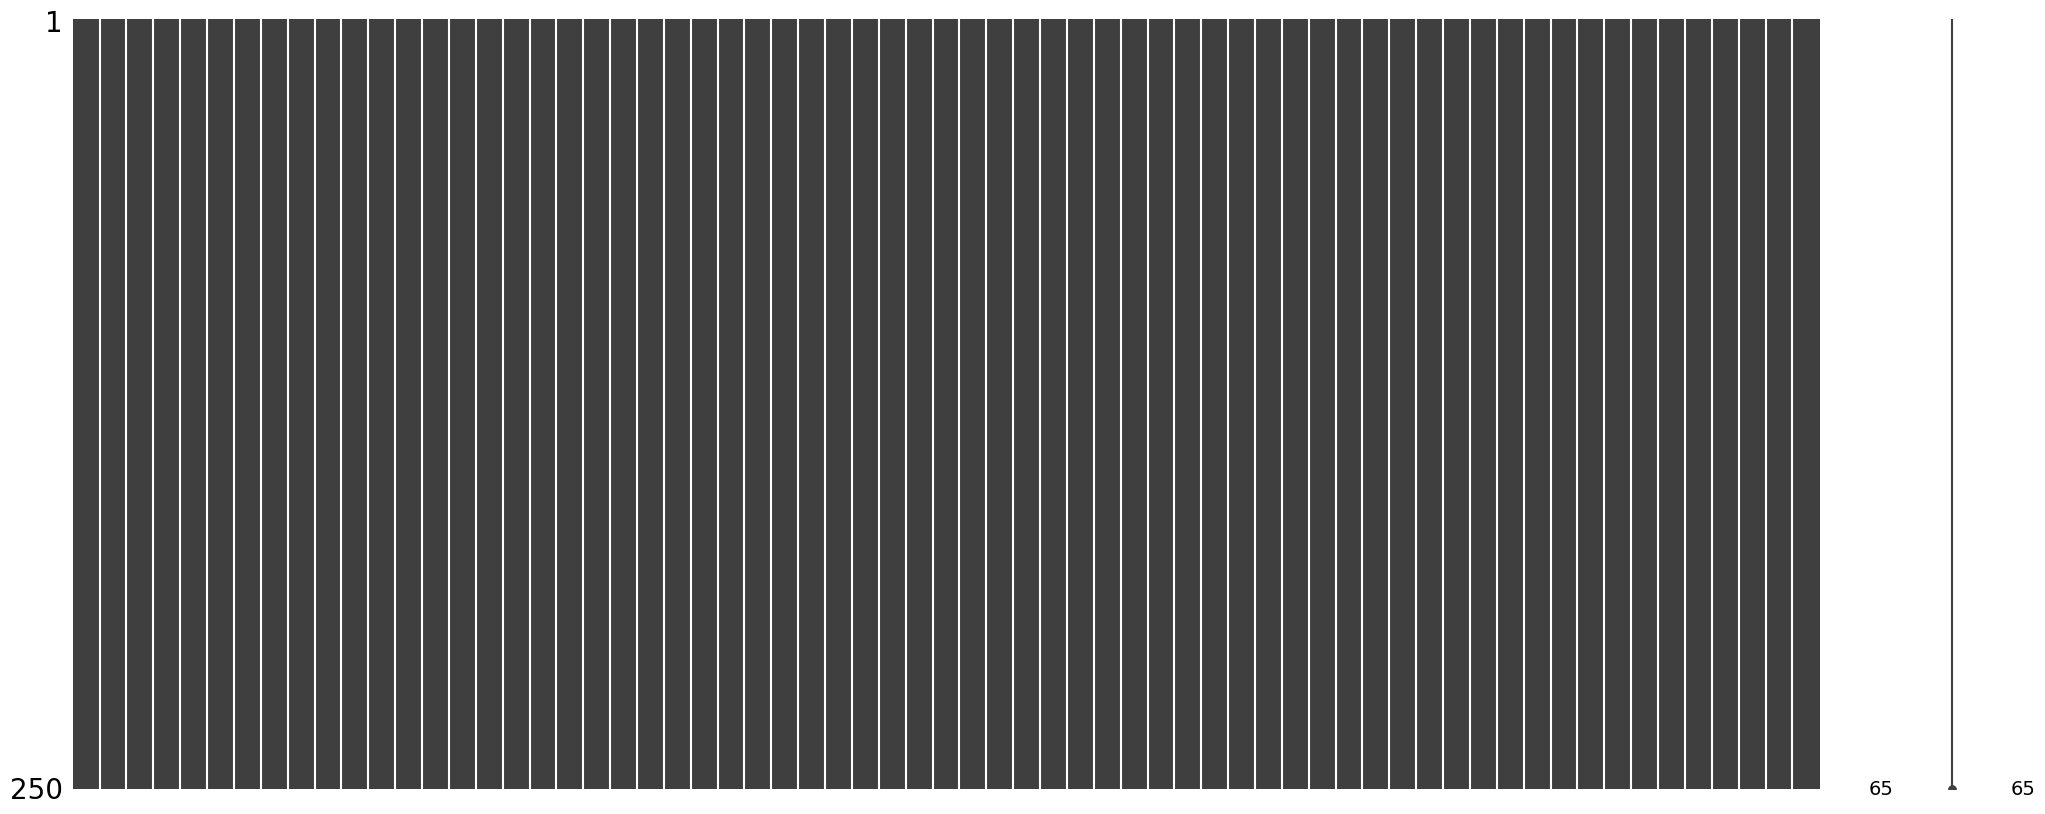

In [156]:
%matplotlib inline
msno.matrix(df.sample(250))

### Display negative values

In [157]:
negative_cols = (df < 0).any()

print("Has negative values :\n")
for col, has_negative in negative_cols.items():
    status = "❌ Yes" if has_negative else "✅ No"
    print(f"- {col:<12}: {status}")

Has negative values :

- 0           : ✅ No
- 1           : ✅ No
- 2           : ✅ No
- 3           : ✅ No
- 4           : ✅ No
- 5           : ✅ No
- 6           : ✅ No
- 7           : ✅ No
- 8           : ✅ No
- 9           : ✅ No
- 10          : ✅ No
- 11          : ✅ No
- 12          : ✅ No
- 13          : ✅ No
- 14          : ✅ No
- 15          : ✅ No
- 16          : ✅ No
- 17          : ✅ No
- 18          : ✅ No
- 19          : ✅ No
- 20          : ✅ No
- 21          : ✅ No
- 22          : ✅ No
- 23          : ✅ No
- 24          : ✅ No
- 25          : ✅ No
- 26          : ✅ No
- 27          : ✅ No
- 28          : ✅ No
- 29          : ✅ No
- 30          : ✅ No
- 31          : ✅ No
- 32          : ✅ No
- 33          : ✅ No
- 34          : ✅ No
- 35          : ✅ No
- 36          : ✅ No
- 37          : ✅ No
- 38          : ✅ No
- 39          : ✅ No
- 40          : ✅ No
- 41          : ✅ No
- 42          : ✅ No
- 43          : ✅ No
- 44          : ✅ No
- 45          : ✅ No
- 46       

### Display outliers

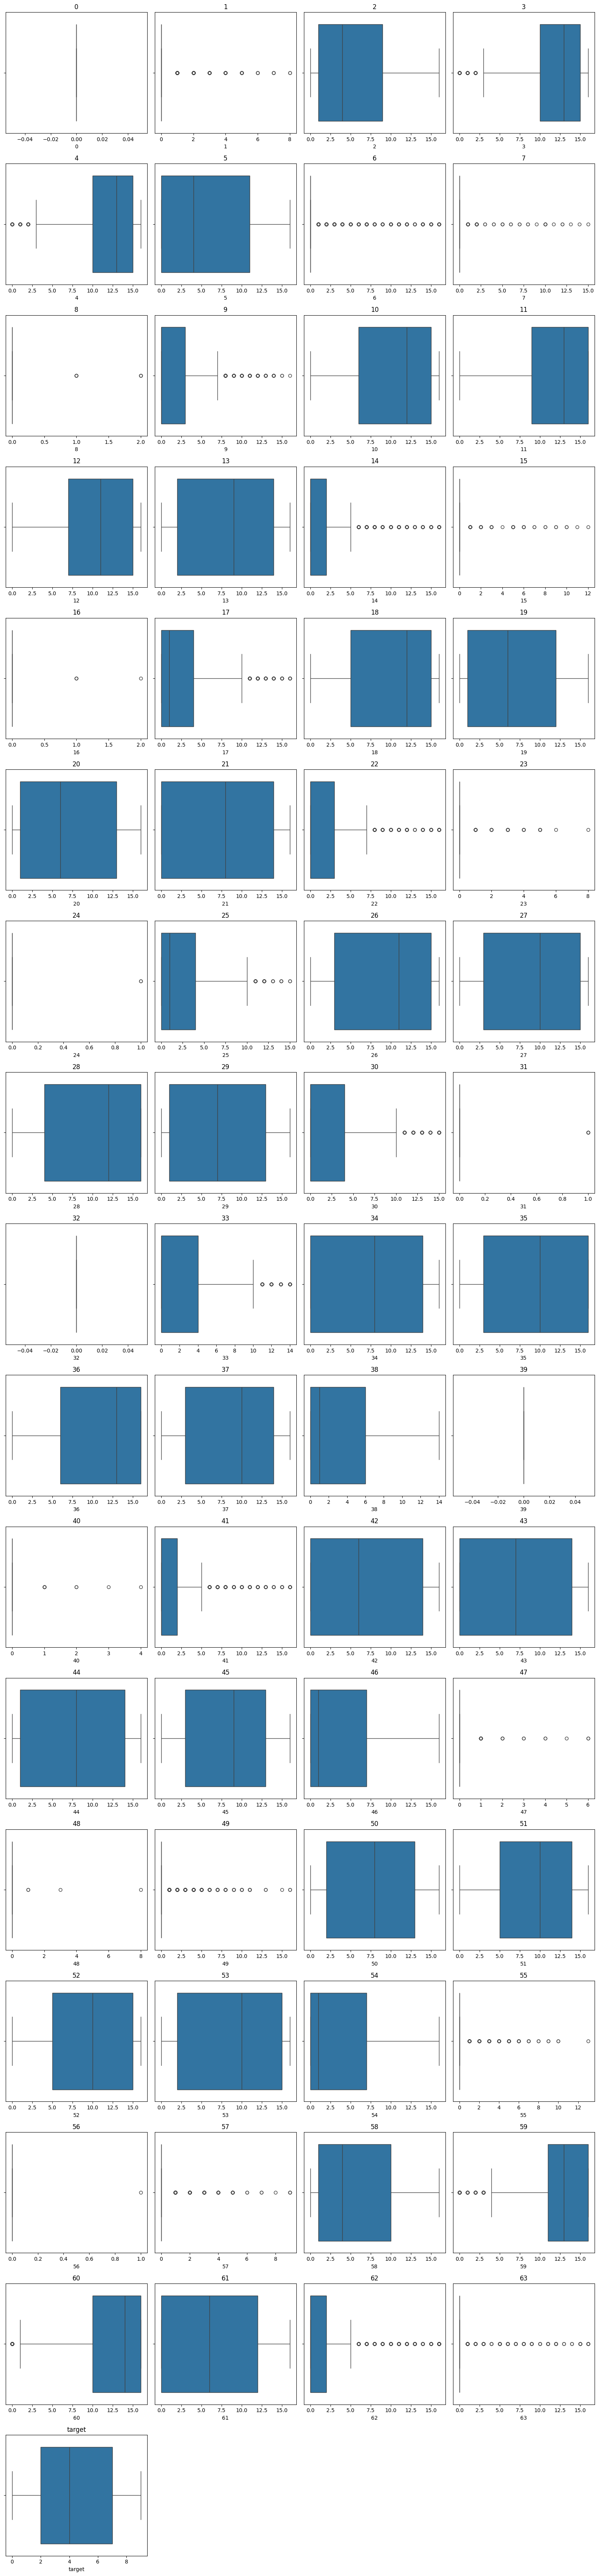

In [158]:
# Get dataset columns
cols = df.columns

# Set grid settings
n_cols = 4
n_rows = (len(cols) + n_cols - 1) // n_cols

# Init grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

# Draw boxplot
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

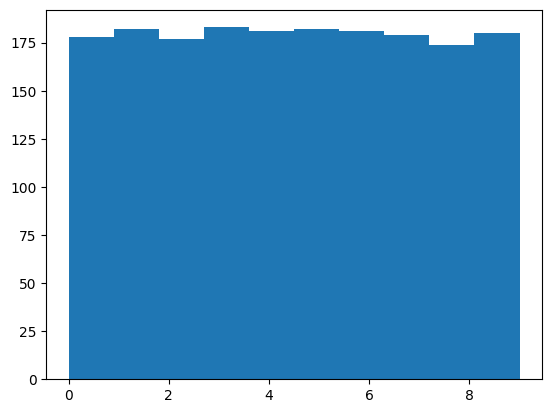

In [159]:
df['target']
plt.hist(df['target'],bins=10)

### Clear dataset

In [160]:
df2 = df.drop_duplicates() # remove duplicated values

X = df2.drop(columns="target") # drop column to predict
y = df2['target']

### Display the datarange

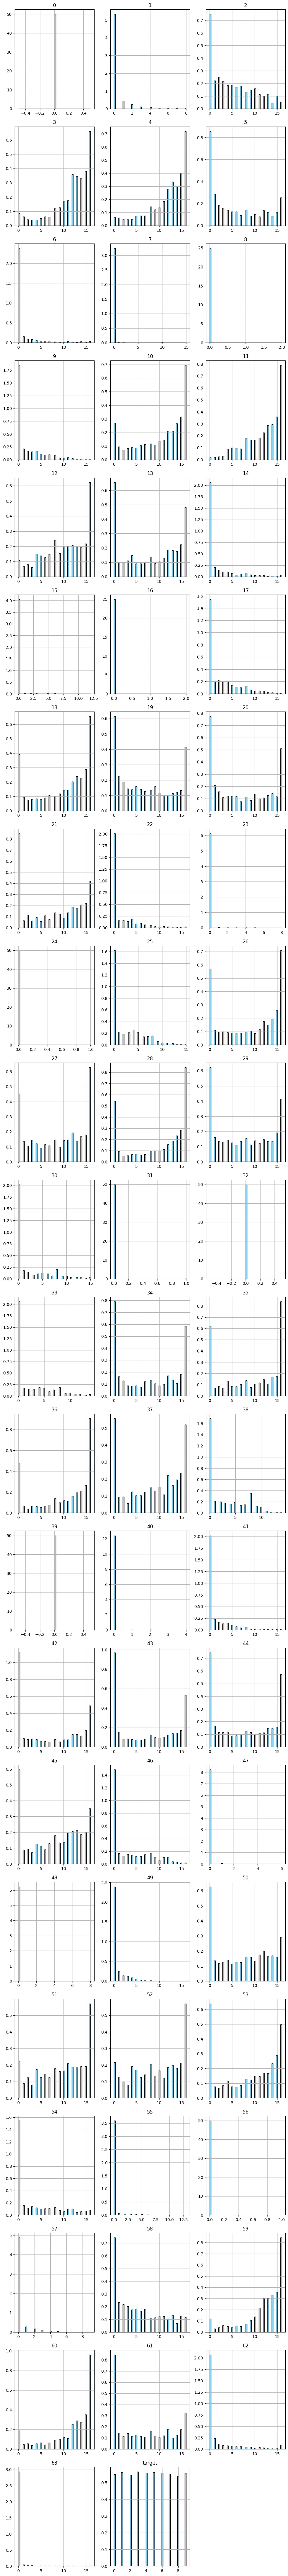

In [161]:
cols = df.columns

n_cols = 3
n_rows = (len(cols) + 1) // n_cols  # compute rows needed

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=50, density=True, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

###  Verify if data can be clustered (PCA + KMeans)

In [162]:
# Create a kmeans pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=2)), # Reduce datas to 2D
    ('kmeans', KMeans(n_clusters=10, random_state=42)) # Group data in 10 clusters
])

# Split dataset (note: y not used for fitting but used for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit only on X (unsupervised learning)
pipeline.fit(X_train)

# Get prediction result
y_pred = pipeline.predict(X_test)

### Info :
Ari (adjusted_rand_score) 
- 0 = no match
- 1 = perfect match

In [163]:
print("-"*40)

print("ari          : ", adjusted_rand_score(y_test, y_pred)) # cluster similarity
print("homogeneity  : ", homogeneity_score(y_test, y_pred)) # cluster homogeneity (contain only one class)
print("completeness : ", completeness_score(y_test, y_pred)) # All items of on class are in the same cluster

print("-"*40)

----------------------------------------
ari          :  0.3746600026039957
homogeneity  :  0.5531298307226344
completeness :  0.5608927189221624
----------------------------------------


### Create a Logistic regression model

In [164]:
# make all columns with same mean (between 0 - 1)
# Cause mean of tax is 408 and mean of crim is 3.614
transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Create linear regrassion pipeline
my_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", LogisticRegression())
])

# Split dataset (train and test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Init model 
my_pipeline.fit(X_train, y_train)

# Get prediction result
y_pred = my_pipeline.predict(X_test)

### Get LogisticRegression model performance

In [165]:
print("-"*30)

print("MAE : ", mean_absolute_error(y_test, y_pred)) 
print("MSE : ", mean_squared_error(y_test, y_pred))
print("R² : ", r2_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("-"*30)

------------------------------
MAE :  0.1388888888888889
MSE :  0.8666666666666667
R² :  0.8943801037392001
Accuracy: 0.9722222222222222
------------------------------


In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

